![front1](jupyter_img/front3.png)

## This Jupyter notebook is available at https://github.com/dkp-quantum/Tutorials

## Further Information

#### * Qiskit: https://qiskit.org

#### * Qiskit GitHub: https://github.com/Qiskit

# A Simple Quantum Error Correcting (QEC) Code 

![qec1](jupyter_img/qec1.png)

![qec2](jupyter_img/qec2.png)

![qec3](jupyter_img/qec_xerror.png)

In [202]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit.visualization import *
import numpy as np

In [203]:
def encoding_x(qc):
    qc.cx(0,1)
    qc.cx(0,2)
    qc.barrier()

def decoding_x(qc):
    qc.cx(0,2)
    qc.cx(0,1)
    qc.barrier()

In [204]:
def random_init(qc,theta,phi,index):
    
    ## Prepare a random single-qubit state
    qc.ry(theta,index)
    qc.rz(phi,index)
    qc.barrier()

def random_init_inv(qc,theta,phi,index):
    
    ## Inverse of the random single-qubit state preparation
    qc.rz(-phi,index)
    qc.ry(-theta,index)
    qc.barrier()

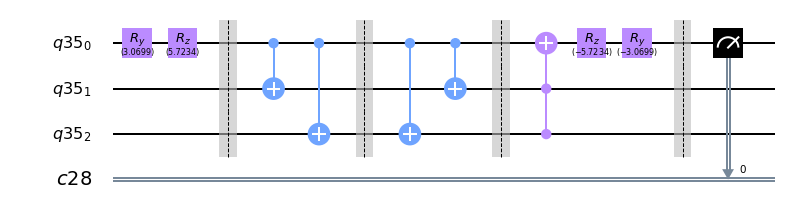

In [225]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qec = QuantumCircuit(q,c)

# Initialize the first qubit in a random state
theta = np.random.random()*np.pi
phi = np.random.random()*2*np.pi
random_init(qec,theta,phi,0)

# QEC encoding for correcting a bit-flip error
encoding_x(qec)

# QEC decoding for correcting a bit-flip error
decoding_x(qec)

# Correction
qec.ccx(1,2,0)

# Insert inverse of the random initial state preparation
# to check that the QEC has worked.
random_init_inv(qec,theta,phi,0)
qec.measure(q[0],c)
qec.draw(output='mpl')

In [226]:
# Use Aer's qasm_simulator
backend_q = Aer.get_backend('qasm_simulator')

In [227]:
# Execute the circuit on the qasm simulator.
job_qec_ref = execute(qec, backend_q, shots=4096)

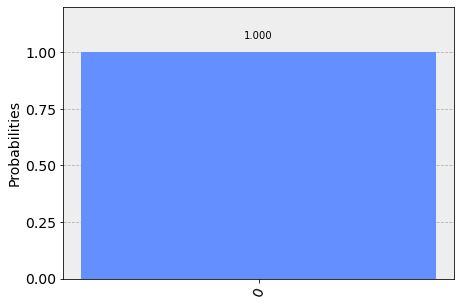

In [228]:
# Grab the results from the job.
result_qec_ref = job_qec_ref.result()
plot_histogram(result_qec_ref.get_counts(qec))

## Let's insert some bit-flip error

In [209]:
# Define bit-flip errors with probability p
def bitflip(qc,qubit,p):
    if np.random.binomial(1,p) == 1:
        qc.x(qubit)

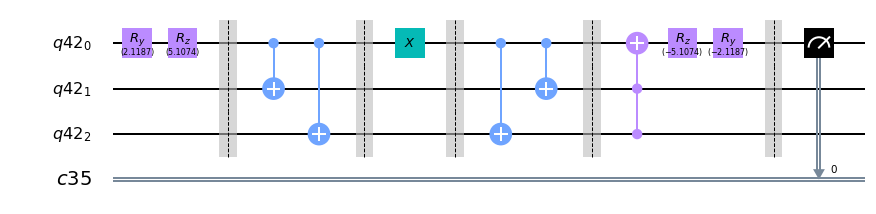

In [239]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qec = QuantumCircuit(q,c)

# Initialize the first qubit in a random state
theta = np.random.random()*np.pi
phi = np.random.random()*2*np.pi
random_init(qec,theta,phi,0)

# QEC encoding for correcting a bit-flip error
encoding_x(qec)

# Insert error
p=1
bitflip(qec,0,p)
# bitflip(qec,1,p)
# bitflip(qec,2,p)
qec.barrier()

# QEC decoding for correcting a bit-flip error
decoding_x(qec)

# Correction
qec.ccx(1,2,0)

# Insert inverse of the random initial state preparation
# to check that the QEC has worked.
random_init_inv(qec,theta,phi,0)
qec.measure(q[0],c)
qec.draw(output='mpl')

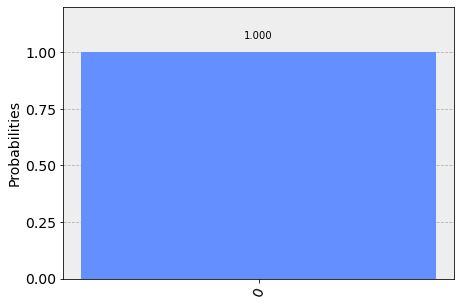

In [240]:
# Execute the circuit on the qasm simulator.
job_qec = execute(qec, backend_q, shots=4096)

# Grab the results from the job.
result_qec = job_qec.result()
plot_histogram(result_qec.get_counts(qec))

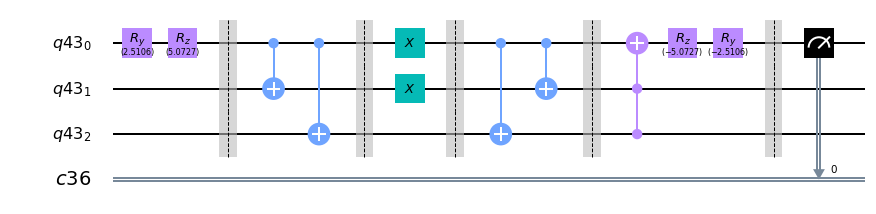

In [241]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qec = QuantumCircuit(q,c)

# Initialize the first qubit in a random state
theta = np.random.random()*np.pi
phi = np.random.random()*2*np.pi
random_init(qec,theta,phi,0)

# QEC encoding for correcting a bit-flip error
encoding_x(qec)

# Insert error
p=1
bitflip(qec,0,p)
bitflip(qec,1,p)
# bitflip(qec,2,p)
qec.barrier()

# QEC decoding for correcting a bit-flip error
decoding_x(qec)

# Correction
qec.ccx(1,2,0)

# Insert inverse of the random initial state preparation
# to check that the QEC has worked.
random_init_inv(qec,theta,phi,0)
qec.measure(q[0],c)
qec.draw(output='mpl')

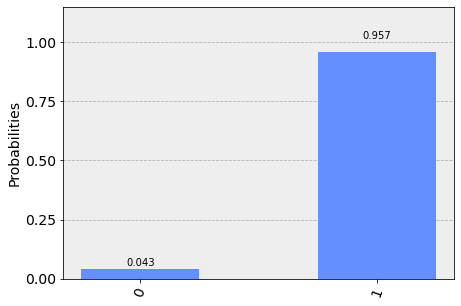

In [242]:
# Execute the circuit on the qasm simulator.
job_qec = execute(qec, backend_q, shots=4096)

# Grab the results from the job.
result_qec = job_qec.result()
plot_histogram(result_qec.get_counts(qec))

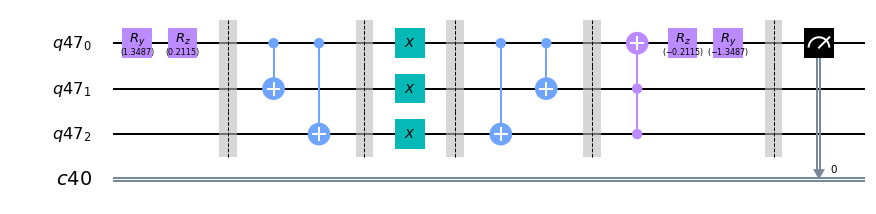

In [249]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qec = QuantumCircuit(q,c)

# Initialize the first qubit in a random state
theta = np.random.random()*np.pi
phi = np.random.random()*2*np.pi
random_init(qec,theta,phi,0)

# QEC encoding for correcting a bit-flip error
encoding_x(qec)

# Insert error
p=1
bitflip(qec,0,p)
bitflip(qec,1,p)
bitflip(qec,2,p)
qec.barrier()

# QEC decoding for correcting a bit-flip error
decoding_x(qec)

# Correction
qec.ccx(1,2,0)

# Insert inverse of the random initial state preparation
# to check that the QEC has worked.
random_init_inv(qec,theta,phi,0)
qec.measure(q[0],c)
qec.draw(output='mpl')

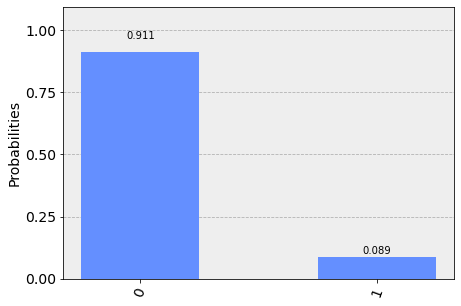

In [250]:
# Execute the circuit on the qasm simulator.
job_qec = execute(qec, backend_q, shots=4096)

# Grab the results from the job.
result_qec = job_qec.result()
plot_histogram(result_qec.get_counts(qec))

![qec3](jupyter_img/qec_zerror.png)

# Quantum Fourier Transform (QFT)

![qft_s1](jupyter_img/qft_slide1.png)

![qft_s1](jupyter_img/qft_slide2.png)

![qft_s1](jupyter_img/qft_slide3.png)

![qft_s1](jupyter_img/qft_slide4.png)

### $CR_k$ can be implemented by the following operation:
<br>

### $CU_1(\theta)=\begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\theta} \end{bmatrix}$
<br>

### The above operation can be implemented with qiskit via ``qc.cu1(theta, control, target)``

### The mapping from $CR_k$ to $CU_1(\theta)$ can be done by setting $\theta = \frac{2\pi}{2^k}$.

![qft_s5](jupyter_img/qft_slide5.png)

![qft_s6](jupyter_img/qft_slide6.png)

![qft_s7](jupyter_img/qft_slide7.png)

![qft_s8](jupyter_img/qft_slide8.png)

## Qiskit Implementation of QTF

* 3-qubit example
* $n$-qubit QFT

In [11]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import backend_overview, backend_monitor, job_monitor
from qiskit.tools.visualization import plot_gate_map, plot_error_map

![qft_q3](jupyter_img/qft_3qubit.png)

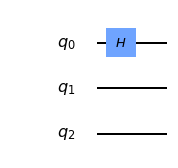

In [26]:
qftc = QuantumCircuit(3)
qftc.h(0)
qftc.draw(output='mpl')

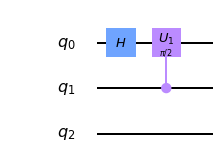

In [27]:
qftc.cu1(2*pi/(2**2), 1, 0) # CROT from qubit 1 to qubit 0
qftc.draw(output='mpl')

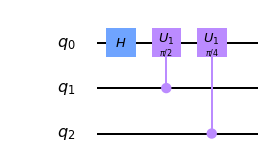

In [28]:
qftc.cu1(2*pi/(2**3), 2, 0) # CROT from qubit 1 to qubit 0
qftc.draw(output='mpl')

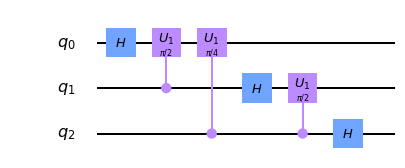

In [29]:
qftc.h(1)
qftc.cu1(2*pi/(2**2), 2, 1) # CROT from qubit 2 to qubit 1
qftc.h(2)
qftc.draw(output='mpl')

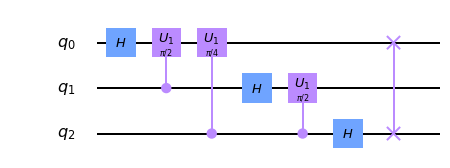

In [30]:
# Complete the QFT circuit by reordering qubits (by exchanging qubit 1 and 3)
qftc.swap(0,2)
qftc.draw(output='mpl')

## Qiskit Implementation of $n$-qubit QTF

In [35]:
def qft_rotations(circuit, n):
    if n == 0: # Exit function if circuit is empty
        print("The number of qubits must be greater than 0")
        return circuit

    index = 0
    circuit.h(index) # Apply the H-gate to the most significant qubit
    index += 1
    n -= 1
    for qubit in range(n): # Apply the controlled rotations conditioned on n-1 qubits
        # For each less significant qubit, we need to do a
        # smaller-angled controlled rotation: 
        circuit.cu1(2*pi/2**(2+qubit), index + qubit, 0)

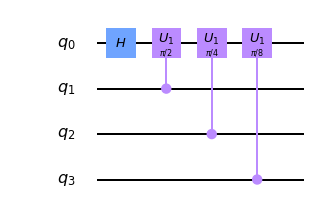

In [36]:
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw(output = 'mpl')

In [121]:
def qft_rotations(circuit, n, start):
    
    if n == 0: # Exit function if circuit is empty
        return circuit
    
    circuit.h(start) # Apply the H-gate to the most significant qubit
    
    if start == n-1:
        return circuit

    for qubit in range(n-1-start): # Apply the controlled rotations conditioned on n-1 qubits
        # For each less significant qubit, we need to do a
        # smaller-angled controlled rotation: 
        circuit.cu1(2*pi/2**(2+qubit), start + 1 + qubit, start)
    start += 1
    circuit.barrier()    
    # Apply QFT recursively
    qft_rotations(circuit, n, start)

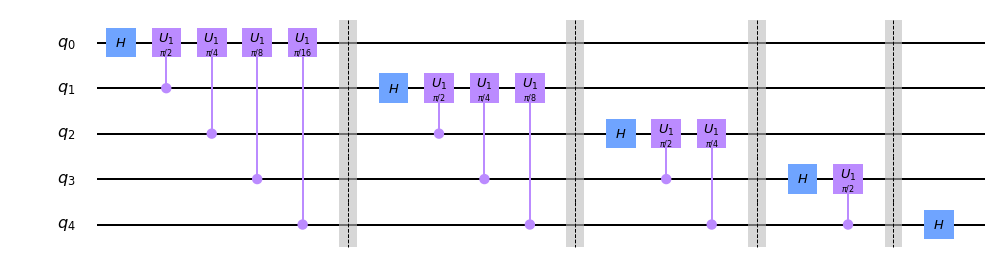

In [251]:
qc = QuantumCircuit(5)
qft_rotations(qc,5,0)
qc.draw(output = 'mpl')